In [42]:
import pandas as pd
import numpy as np
import tweepy
import re 
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
wordnet = WordNetLemmatizer()
import re
from nltk.tokenize import sent_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
import requests
from bs4 import BeautifulSoup as bs
from selenium import webdriver
from selenium.common.exceptions import NoSuchElementException
from selenium.common.exceptions import ElementNotVisibleException
import time
from urllib.request import urlopen, urlretrieve

In [43]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SohailShaikh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\SohailShaikh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\SohailShaikh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## __1 - Business Problem__  
___Extract movie reviews for any movie from IMDB and perform sentimental analysis___  

## __2 - Data collection and description__ 

#### __2.1 Connecting to IMDB__ 

In [72]:
url = "https://www.imdb.com/title/tt0108778/reviews?ref_=tt_ql_3"

In [83]:
html=urlopen(url)

In [84]:
content_bs=BeautifulSoup(html)

#### __2.2 Downloading review of famous Sitcom Friends__ 

In [76]:
reviews=[]

In [88]:
reviews = content_bs.findAll("div",attrs={"class","text"})
for i in range(len(reviews)):
    reviews[i] = reviews[i].text

In [119]:
friends_reviews = pd.DataFrame(columns = ["reviews"])

In [120]:
friends_reviews["reviews"]= reviews

In [121]:
friends_reviews.head(5)

,reviews
0,Don't watch friends all ten season because tha...
1,There never has been a sitcom that truly pictu...
2,'Friends' is simply the best series ever aired...
3,I've been reading a lot of these comments. Som...
4,People are saying that friends is running out ...


#### __2.3 Cleaning the text__ 

In [124]:
txt_upd = ' '.join(reviews)

In [126]:
txt_upd = re.sub("[^A-Za-z" "]+"," ",txt_upd).lower() #remove special character
txt_upd = re.sub("[0-9" "]+"," ",txt_upd).lower() #remove numbers
txt_upd = re.sub(r'^https?:\/\/.*[\r\n]*', '', txt_upd).lower() #remove hyperlink

In [127]:
text_tokens = word_tokenize(txt_upd)

In [128]:
tokens_without_sw = [word for word in text_tokens if not word in stopwords.words()]

#### __2.4 Create the DF__ 

In [129]:
tf = TfidfVectorizer()

In [130]:
text_tf = tf.fit_transform(tokens_without_sw)

In [131]:
feature_names = tf.get_feature_names()
dense = text_tf.todense()
denselist = dense.tolist()
df =pd.DataFrame(denselist, columns=feature_names)

In [132]:
df

,ability,able,absolute,absolutely,acted,acting,actor,actors,actresses,actually,...,world,would,writers,writing,wrong,year,yearn,years,yesterday,yet
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1423,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1424,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1425,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1426,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [133]:
word_list = ' '.join(df)

In [134]:
wordcloud = WordCloud(background_color='black',
                      width=1800,
                      height=1400).generate(word_list)

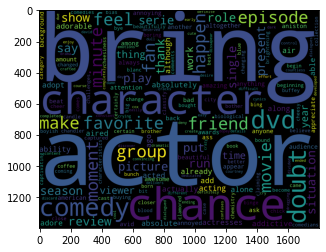

In [135]:
plt.imshow(wordcloud)

## __3 Sentimental Analysis__ 

In [136]:
with open("C:/Users/SohailShaikh/OneDrive - tiqets.com/Tiqets/Adhoc/DS/Text Mining/positive-words.txt","r") as pw:
    positive_words = pw.read().split("\n")

In [137]:
positive_words = positive_words[35:]

In [138]:
with open("C:/Users/SohailShaikh/OneDrive - tiqets.com/Tiqets/Adhoc/DS/Text Mining/negative-words.txt","r", encoding='latin-1') as nw:
    negative_words = nw.read().split("\n")

In [139]:
negative_words = negative_words[35:]

In [140]:
txt_neg_in_nw = ' '.join([word for word in df if word in negative_words])

In [141]:
wordcloud_neg = WordCloud(
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(txt_neg_in_nw)

In [142]:
txt_pos_in_pw = ' '.join([word for word in df if word in positive_words])

In [143]:
wordcloud_pos = WordCloud(
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(txt_pos_in_pw)

## __4 Conclusion__ 

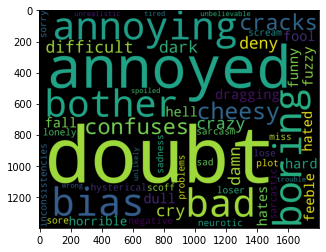

In [144]:
plt.imshow(wordcloud_neg)

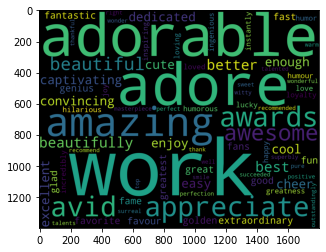

In [145]:
plt.imshow(wordcloud_pos)